In [1]:
import numpy as np
import pandas as pd
from IsochroneArchive.myTools import my_utility

In [2]:
def scale_factors(filepath: str, c_solution: int):

    if c_solution == 6:
        stds = np.genfromtxt(filepath, usecols=(1,2,3), skip_header=2,max_rows=5)
    elif c_solution == 4:
        stds = np.genfromtxt(filepath, usecols=(1,2,3), skip_header=10, max_rows=5)
    else:
        print("Only 4C and 6C solutions available at the moment")
        stds = None

    sfs = np.empty(shape=(5,3))
    for h, row in enumerate(stds[:]):
        flipped_row = row[::-1]
        sfs[h] = 1/flipped_row

    return sfs

In [3]:
output_path = my_utility.set_output_path(main_path='/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Projects/Sigma_Orion/Coding/Code_output/')

In [4]:
std_path = "/Users/alena/PycharmProjects/SigMA_Orion/Start_data/Region_0/simulated_sfs.txt"
sf= scale_factors(std_path, 6)


In [5]:
float(bool(True))

1.0

In [6]:
cols = ["SN",        "KNN",       "bh",
        "ra_low",    "ra_mid",    "ra_high",
        "dec_low",   "dec_mid",   "dec_high",
        "plx_low",   "plx_mid",   "plx_high",
        "pmra_low",  "pmra_mid",  "pmra_high",
        "pmdec_low", "pmdec_mid", "pmdec_high",
        "std_ra_low",    "std_ra_mid",    "std_ra_high",
        "std_dec_low",   "std_dec_mid",   "std_dec_high",
        "std_plx_low",   "std_plx_mid",   "std_plx_high",
        "std_pmra_low",  "std_pmra_mid",  "std_pmra_high",
        "std_pmdec_low", "std_pmdec_mid", "std_pmdec_high"]

result_array = np.empty(shape = (24, len(cols), 3))
n_array = np.empty(shape = (24, len(cols), 3))

In [7]:
import os


directories = [f"Run_SF-6C-{i}/" for i in range(1,25)]


for d_count,directory in enumerate(directories):

    directory_path = "/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Projects/Sigma_Orion/Coding/Code_output/2023-12-05/" + directory

    summary_file = [file for file in os.listdir(directory_path) if file.endswith('summary.csv')][0]
    sn = summary_file.split("_")[2]
    knn = summary_file.split("_")[4]
    bh = summary_file.split("_")[6].lower() == "true"

    ref_medians = []
    ref_stds = []
    for j,ref in enumerate(sf):
        for sf_val in ref:
            gp_list = []
            # Iterate through all files in the directory
            for filename in os.listdir(directory_path):
                # Check if the file is a text file and starts with "Parameters_gp"
                if filename.endswith(".txt") and filename.startswith("Parameters_gp"):
                    # Extract the number from the filename
                    file_number = int(filename.split("_")[2].split(".")[0])

                    # Read the content of the file
                    line = str(np.genfromtxt(os.path.join(directory_path, filename), dtype=str, usecols=(2,3,4,5,6), skip_header=5, max_rows = 1))
                    array_str = line.replace('[', '').replace(']', '').replace("'",'')

                    gp_val = np.fromstring(array_str, sep=' ')[j]

                    if gp_val == round(sf_val,8):
                        gp_list.append(file_number)

            summary_df = pd.read_csv(directory_path+summary_file, index_col=0)
            filtered_df = summary_df[summary_df.index.isin(gp_list)]
            ref_medians.append(filtered_df.median())
            ref_stds.append(filtered_df.std())

    result_array[d_count, :, 0] = [float(sn), float(knn), float(bool(bh))] + [ref_medians[i].nmi_rfs for i in range(len(ref_medians))] +                                                                                [ref_stds[i].nmi_rfs for i in range(len(ref_stds))]
    result_array[d_count, :, 1] =  [float(sn), float(knn), float(bool(bh))] + [ref_medians[i].nmi_rsc for i in range(len(ref_medians))] +                                                                                [ref_stds[i].nmi_rsc for i in range(len(ref_stds))]
    result_array[d_count, :, 2] = [float(sn), float(knn), float(bool(bh))] + [ref_medians[i].nmi_new for i in range(len(ref_medians))] +                                                                                [ref_stds[i].nmi_new for i in range(len(ref_stds))]


    n_array[d_count, :, 0] = [float(sn), float(knn), float(bool(bh))] + [ref_medians[i].n_rfs for i in range(len(ref_medians))] +                                                                                [ref_stds[i].n_rfs for i in range(len(ref_stds))]
    n_array[d_count, :, 1] =  [float(sn), float(knn), float(bool(bh))] + [ref_medians[i].n_rsc for i in range(len(ref_medians))] +                                                                                [ref_stds[i].n_rsc for i in range(len(ref_stds))]
    n_array[d_count, :, 2] = [float(sn), float(knn), float(bool(bh))] + [ref_medians[i].n_new for i in range(len(ref_medians))] +                                                                                [ref_stds[i].n_new for i in range(len(ref_stds))]

In [8]:
df_rfs = pd.DataFrame(data = result_array[:,:,0], columns=cols)
df_rfs[["KNN","bh"]] = df_rfs[["KNN","bh"]].astype(int,bool)
df_rsc = pd.DataFrame(data = result_array[:,:,1], columns=cols)
df_rsc[["KNN","bh"]] = df_rsc[["KNN","bh"]].astype(int,bool)
df_new = pd.DataFrame(data = result_array[:,:,2], columns=cols)
df_new[["KNN","bh"]] = df_new[["KNN","bh"]].astype(int,bool)

In [9]:
df_n_rfs = pd.DataFrame(data = n_array[:,:,0], columns=cols)
df_n_rfs[["KNN","bh"]] = df_n_rfs[["KNN","bh"]].astype(int,bool)
df_n_rsc = pd.DataFrame(data = n_array[:,:,1], columns=cols)
df_n_rsc[["KNN","bh"]] = df_n_rsc[["KNN","bh"]].astype(int,bool)
df_n_new = pd.DataFrame(data = n_array[:,:,2], columns=cols)
df_n_new[["KNN","bh"]] = df_n_new[["KNN","bh"]].astype(int,bool)

In [10]:
df_n_rfs.head()

,SN,KNN,bh,ra_low,ra_mid,ra_high,dec_low,dec_mid,dec_high,plx_low,...,std_dec_high,std_plx_low,std_plx_mid,std_plx_high,std_pmra_low,std_pmra_mid,std_pmra_high,std_pmdec_low,std_pmdec_mid,std_pmdec_high
0,0.5,15,1,4.0,4.0,3.0,4.0,4.0,3.0,4.0,...,0.503077,0.736818,0.724569,0.774597,0.848201,0.707107,0.527339,0.656402,0.704045,0.835183
1,0.9,15,1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.498454,0.637801,0.659920,0.720297,0.703167,0.644301,0.501233,0.586894,0.670820,0.744942
2,0.2,15,1,4.0,4.0,3.0,4.0,4.0,3.0,4.0,...,0.524404,0.629766,0.631234,0.643582,0.647645,0.654990,0.534894,0.542627,0.588732,0.716430
3,0.2,20,1,4.0,4.0,3.0,4.0,3.0,4.0,4.0,...,0.618640,0.628048,0.598094,0.584787,0.724782,0.503077,0.537771,0.584787,0.613380,0.605020
4,0.5,20,1,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0.538631,0.542058,0.591608,0.595767,0.641179,0.530839,0.518485,0.639975,0.518485,0.565194


/var/folders/z6/y4rdkpdx3vlbwtmngx04x_1w0000gp/T/ipykernel_3925/3266037851.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


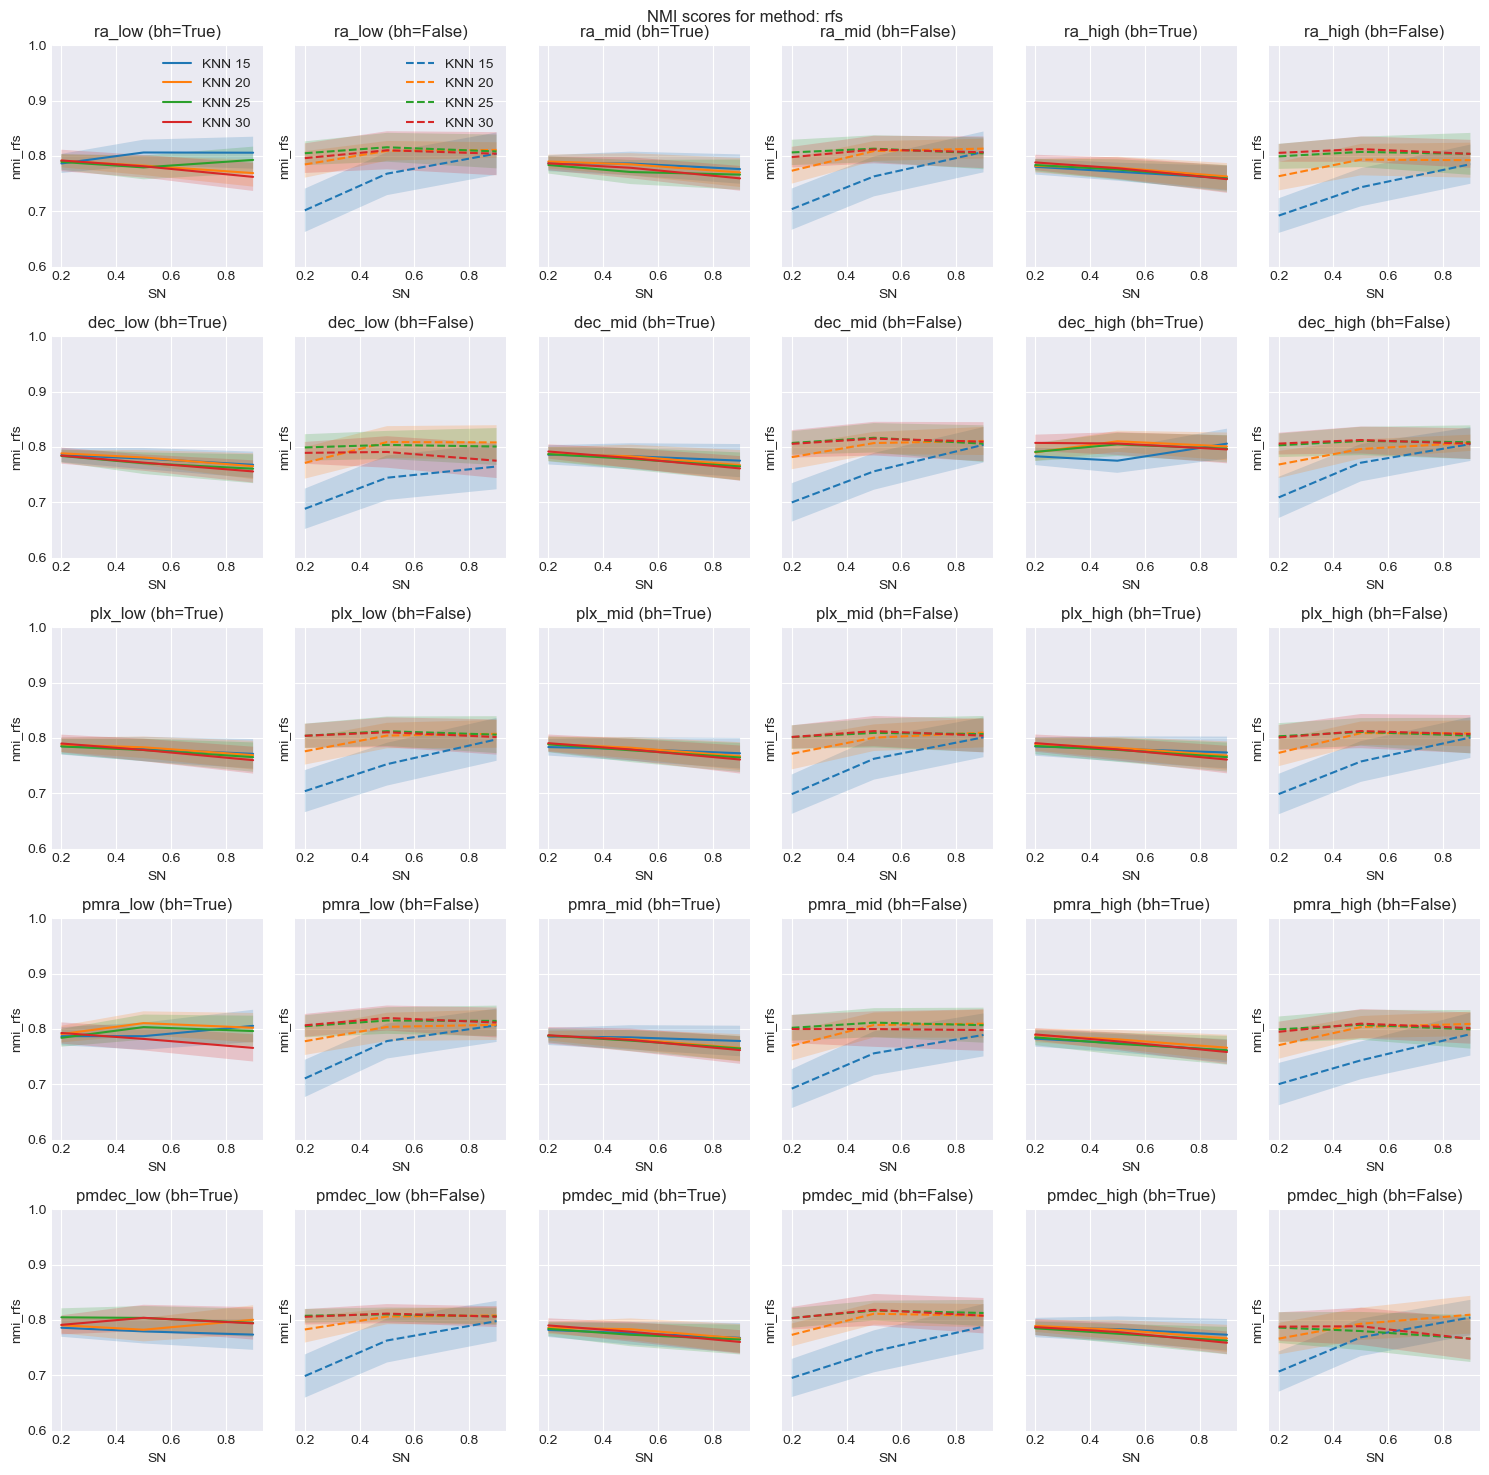

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


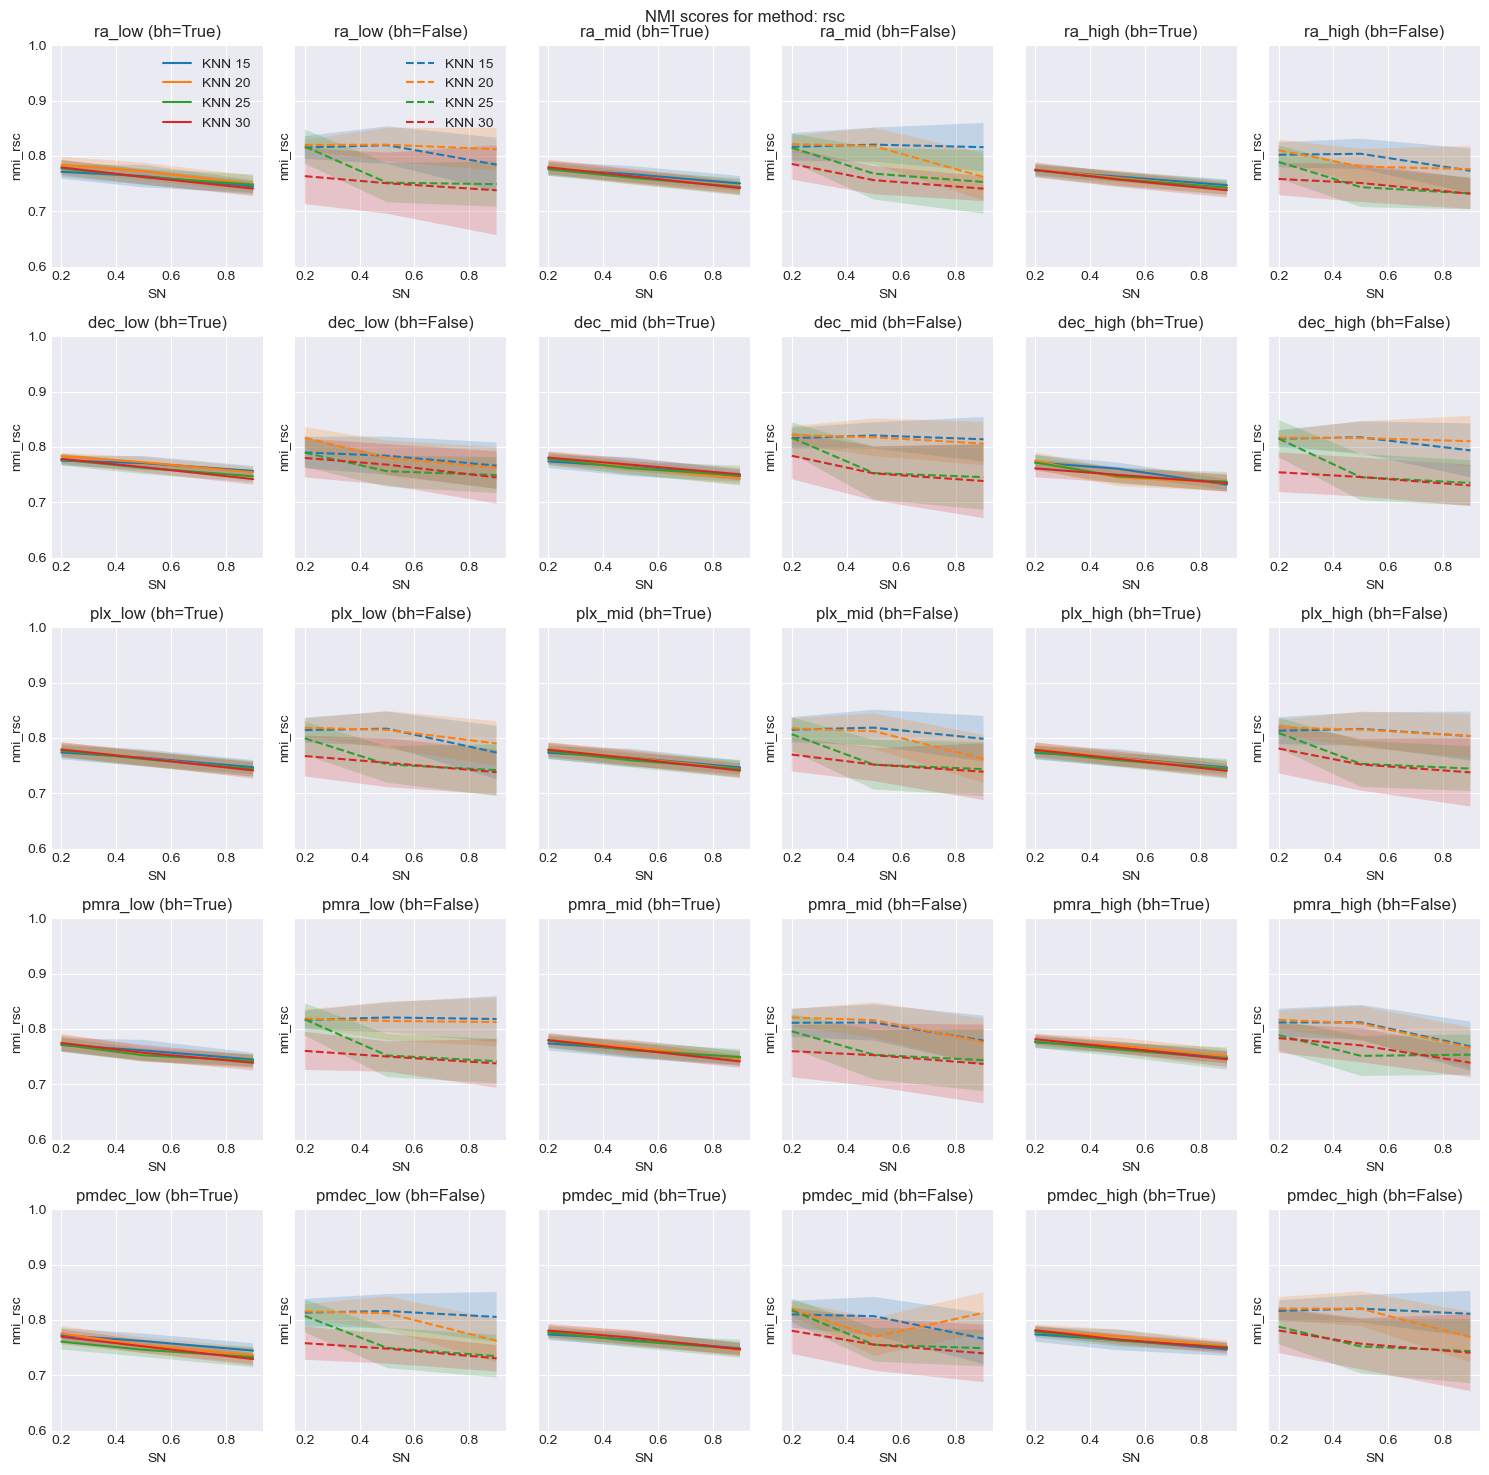

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


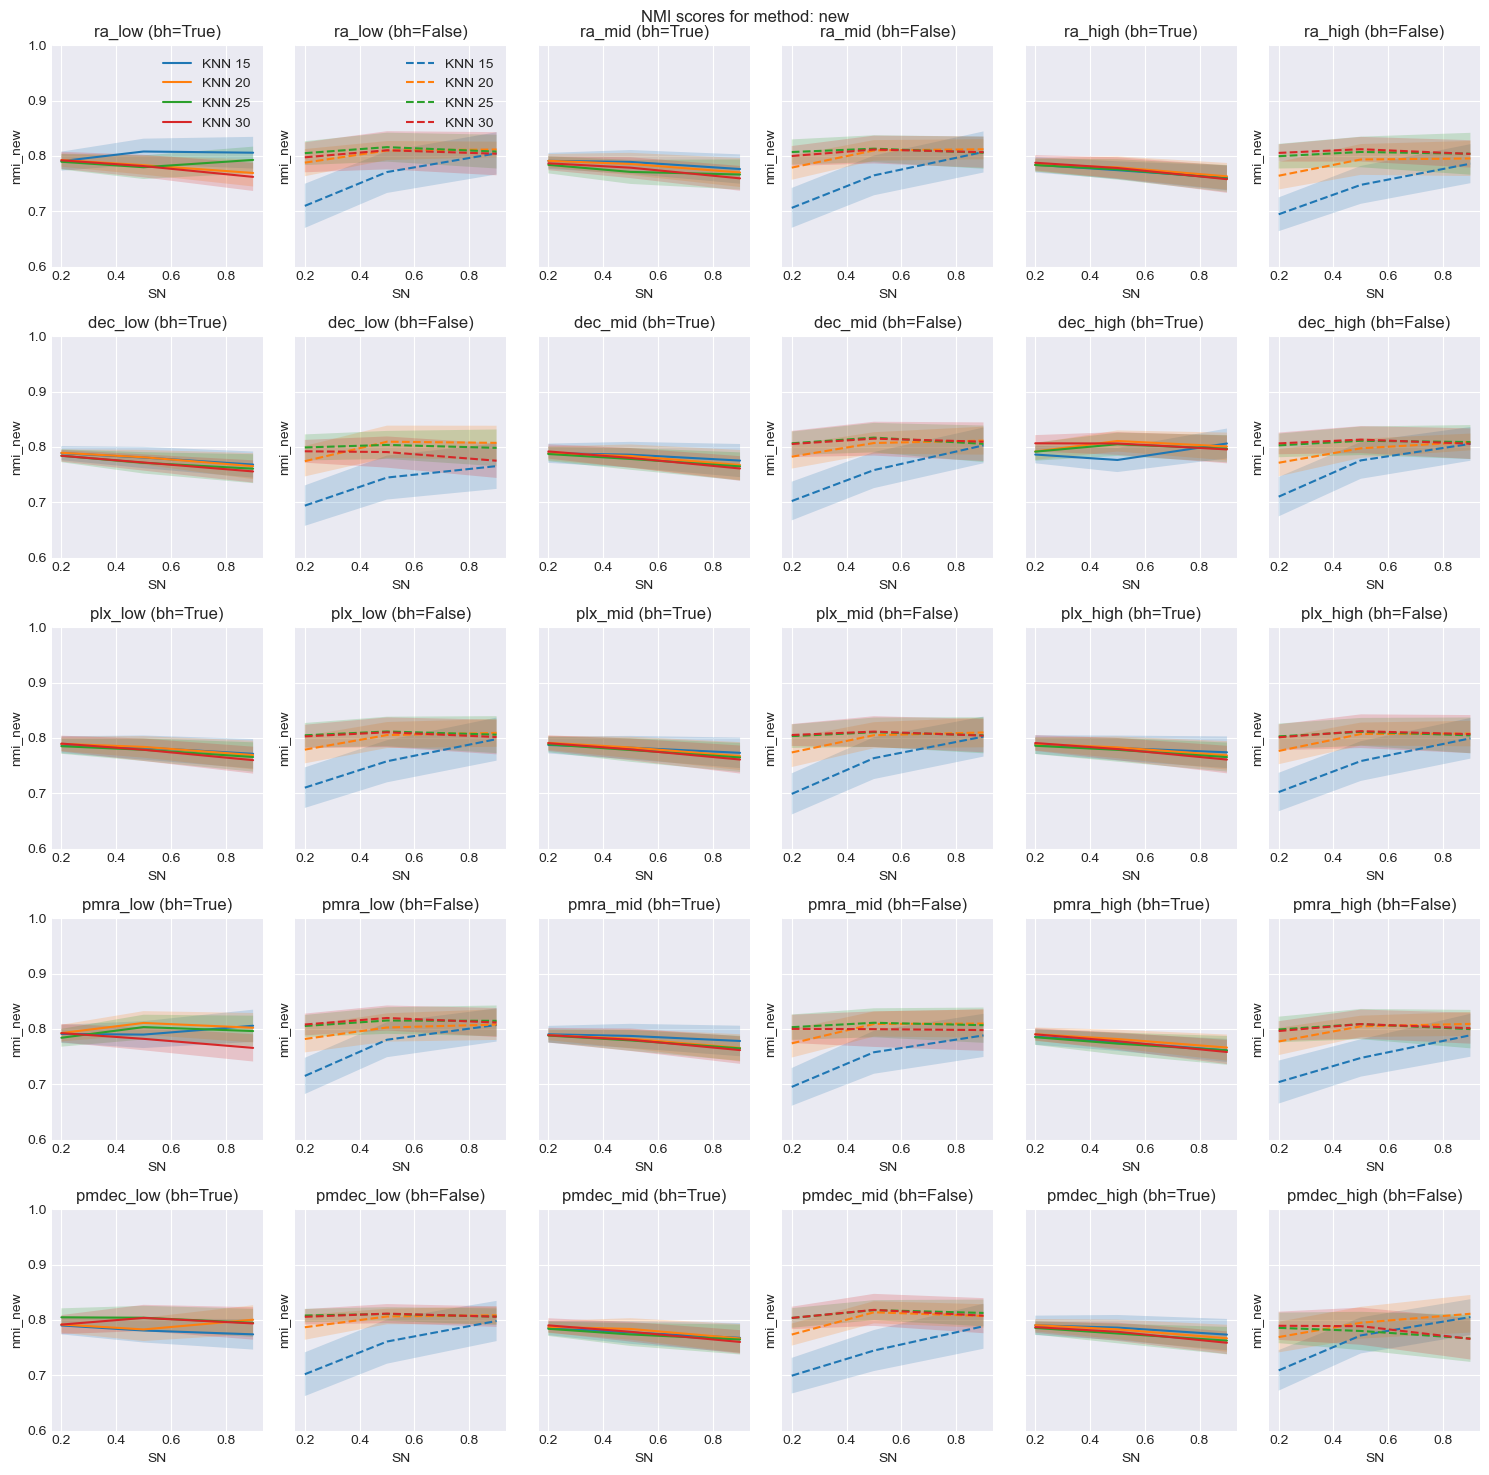

In [13]:
import matplotlib.pyplot as plt

# Set the style of the plot (optional)
plt.style.use('seaborn-darkgrid')

# Define the columns of interest
columns_of_interest = ['ra_low', 'ra_mid', 'ra_high', 'dec_low', 'dec_mid', 'dec_high',
                         'plx_low', 'plx_mid', 'plx_high', 'pmra_low', 'pmra_mid', 'pmra_high',
                         'pmdec_low', 'pmdec_mid', 'pmdec_high']


for df,method in zip([df_rfs, df_rsc, df_new],["rfs", "rsc","new"]):

    # Create subplots for each column
    fig, axes = plt.subplots(5, 6, sharey=True, figsize=(15, 15))
    axes = axes.flatten()

    # Group the DataFrame by the 'KNN' and 'bh' columns
    grouped_df = df.groupby(['KNN', 'bh'])

    ax_id = 0
    for col, ax in zip(columns_of_interest, axes):
        # Plotting for bh=True
        for (knn, bh), group in grouped_df:
            if bh.all():

                group.sort_values(by="SN", inplace=True)
                axes[ax_id].plot(
                    group['SN'],
                    group[col],
                    label=f'KNN {knn}',
                    linestyle='-'
                )
                axes[ax_id].fill_between(
                    group['SN'],
                    group[col] - group[f'std_{col}'],
                    group[col] + group[f'std_{col}'],
                    alpha=0.2
                )
            axes[ax_id].set_xlabel('SN')
            if ax_id in (0,6,12,18,24):
                axes[ax_id].set_ylabel(f'nmi_{method}')
            if ax_id == 0:
                axes[ax_id].legend()
            axes[ax_id].set_title(f'{col} (bh=True)')
            axes[ax_id].set_ylim(0.6,1)

        # Plotting for bh=False
        for (knn, bh), group in grouped_df:
            if not bh.any():
                group.sort_values(by="SN", inplace=True)
                axes[ax_id+1].plot(
                    group['SN'],
                    group[col],
                    label=f'KNN {knn}',
                    linestyle='--'
                )
                axes[ax_id+1].fill_between(
                    group['SN'],
                    group[col] - group[f'std_{col}'],
                    group[col] + group[f'std_{col}'],
                    alpha=0.2
                )

            # Adding labels and legend
            axes[ax_id+1].set_xlabel('SN')
            if int(ax_id+1) ==1:
                axes[ax_id+1].legend()
            axes[ax_id+1].set_ylabel(f'nmi_{method}')
            #axes[ax_id+1].legend()
            axes[ax_id+1].set_title(f'{col} (bh=False)')
            axes[ax_id+1].set_ylim(0.6,1)


        ax_id +=2
    # Adjust layout for better readability
    plt.suptitle(f"NMI scores for method: {method}")

    plt.tight_layout()

    plt.savefig(output_path+f"nmi_summary_{method}.pdf", dpi=400)

    # Show the plots
    plt.show()
    #plt.close()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


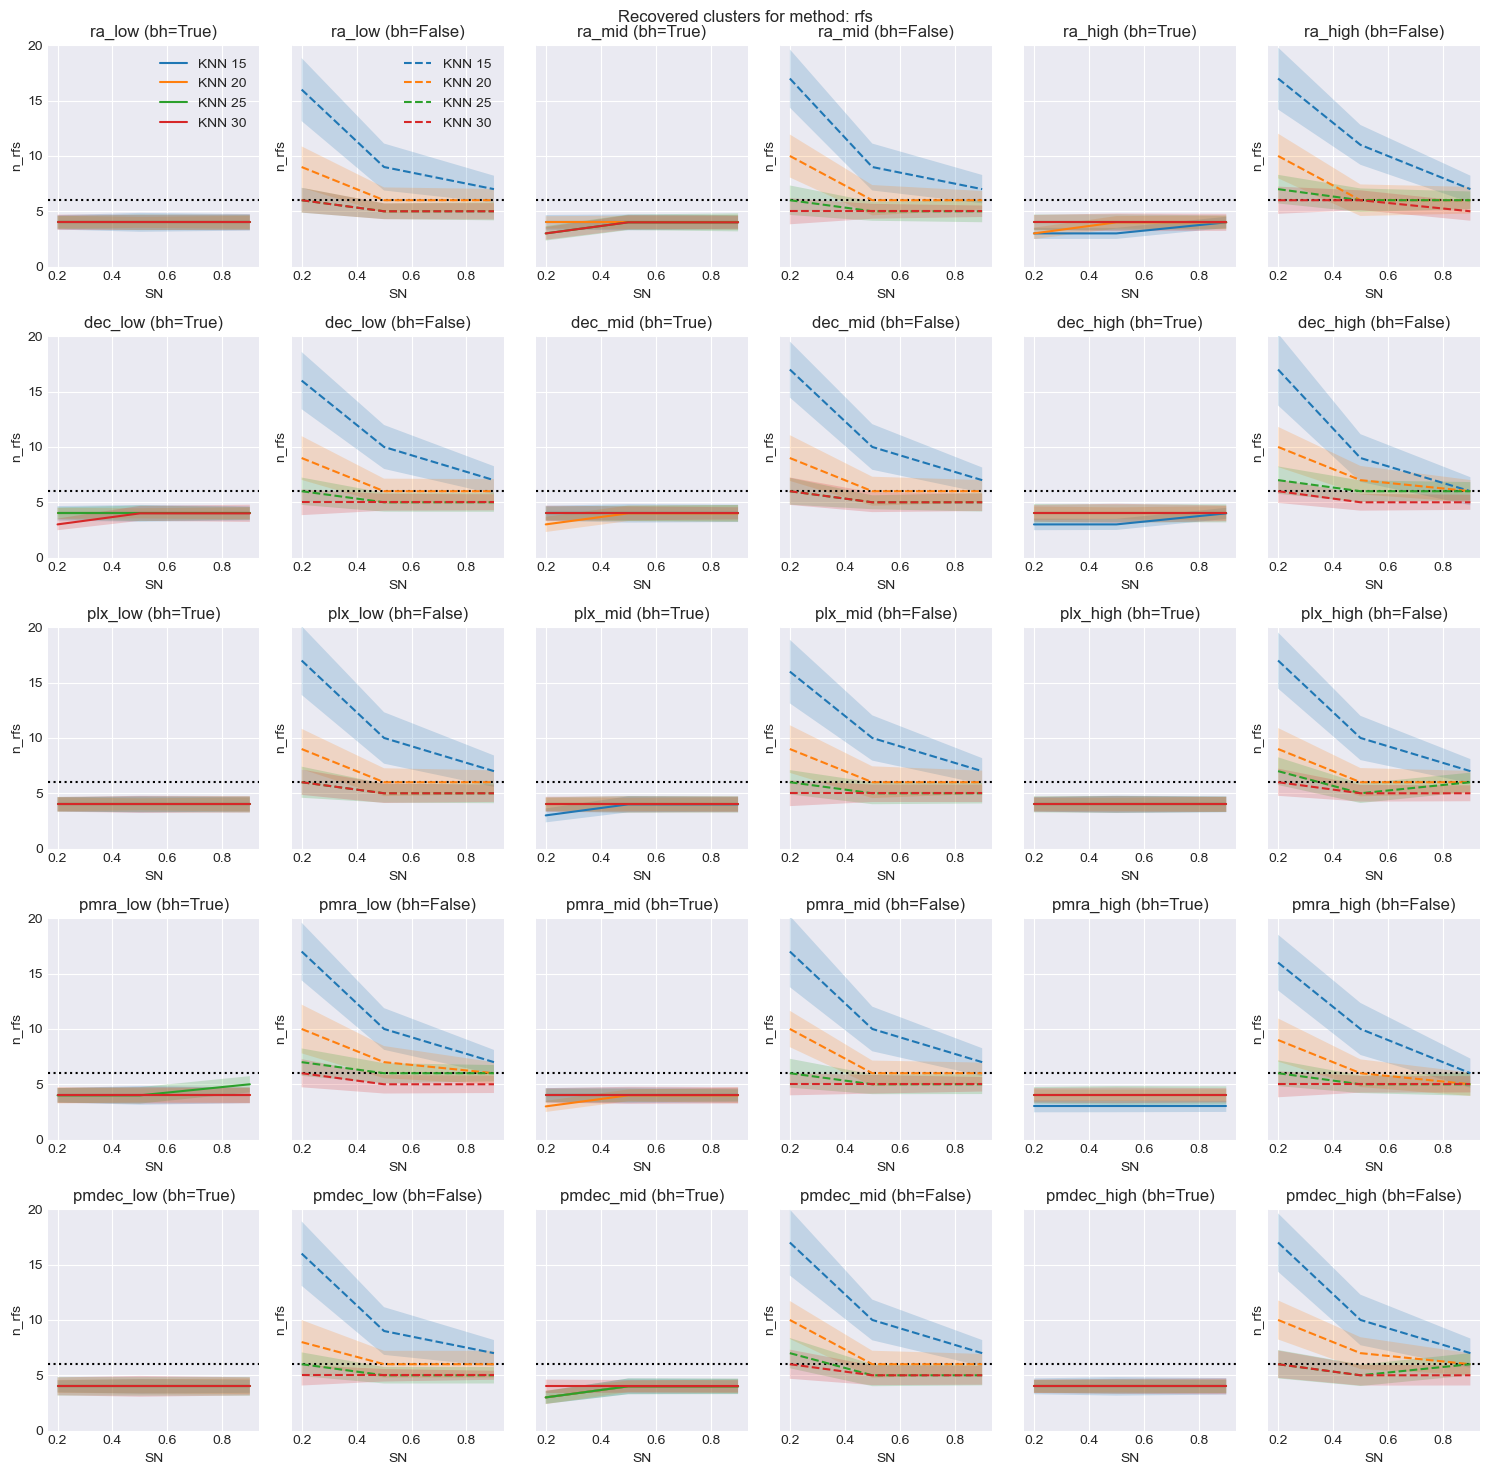

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


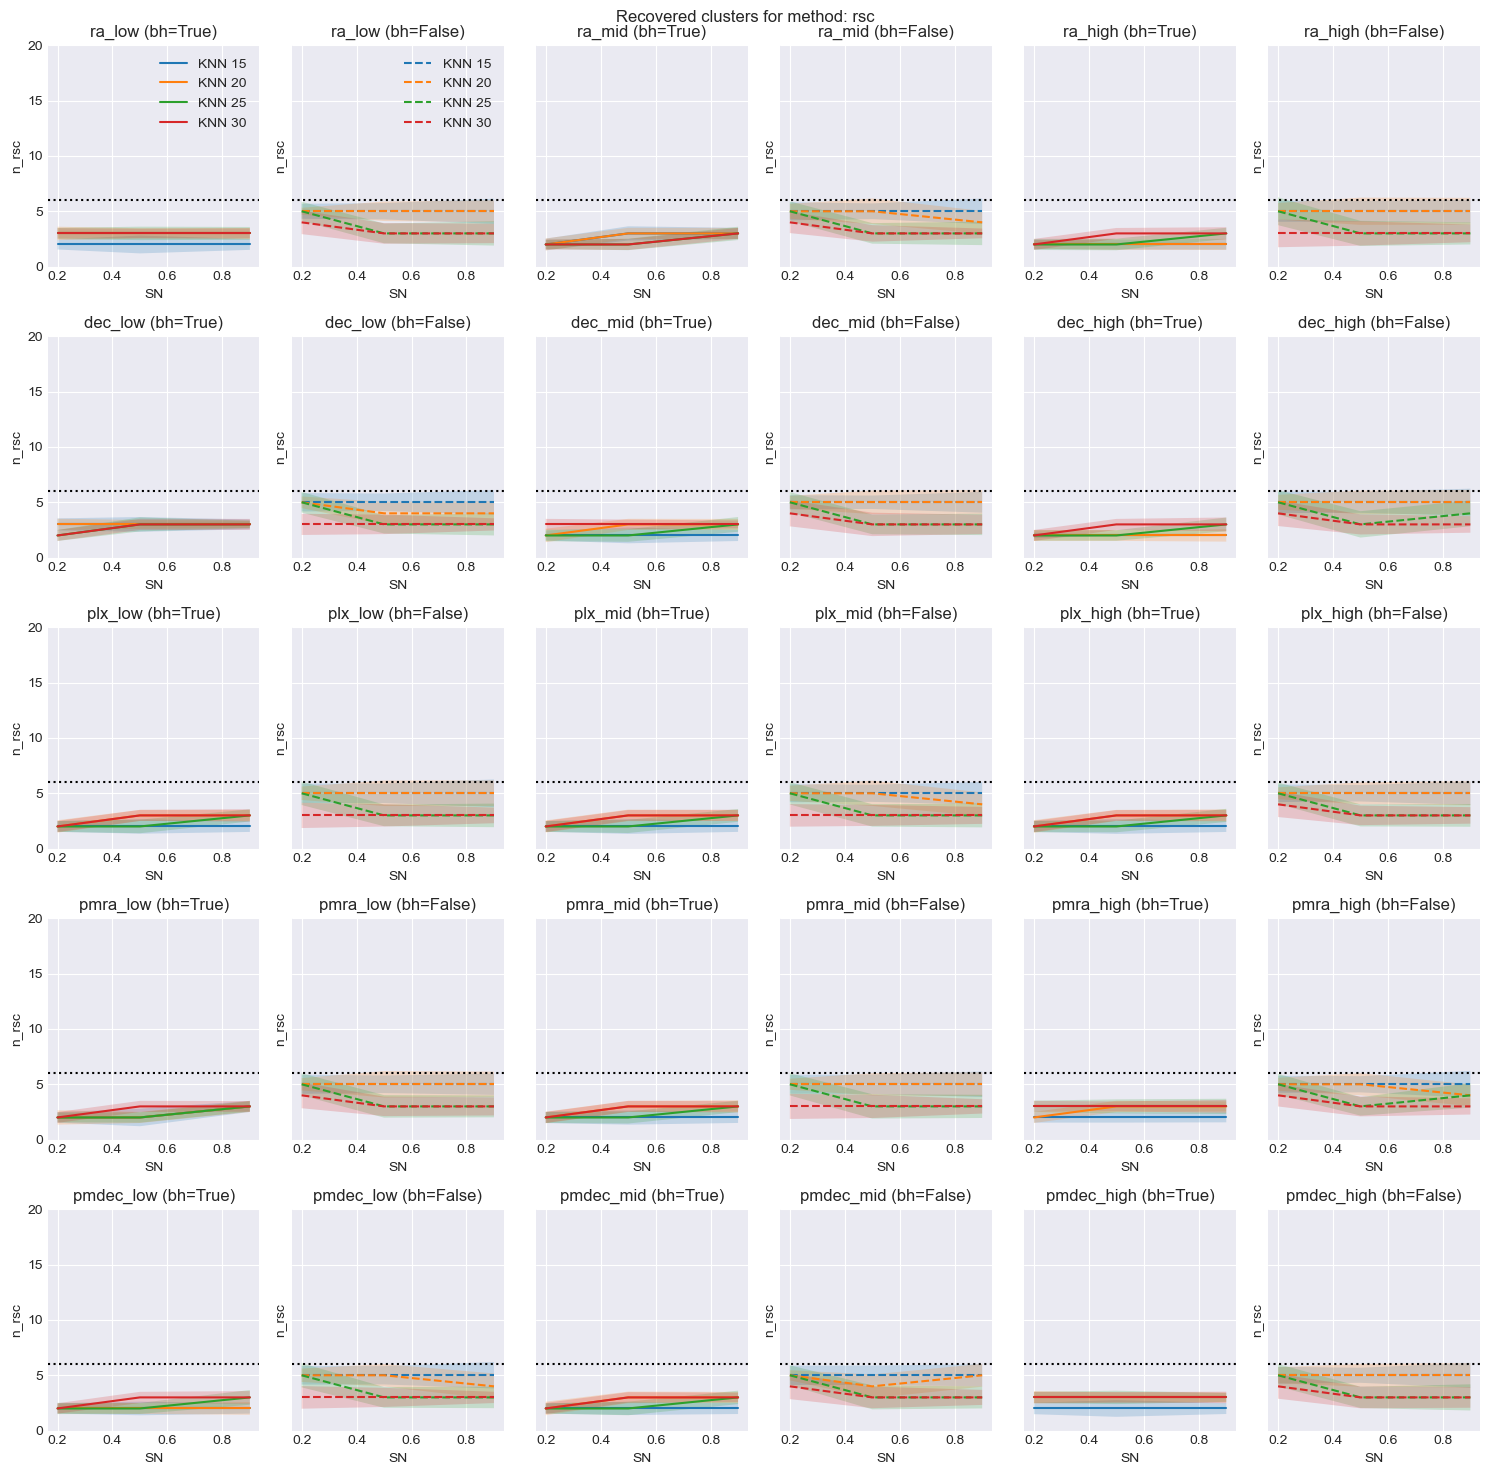

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


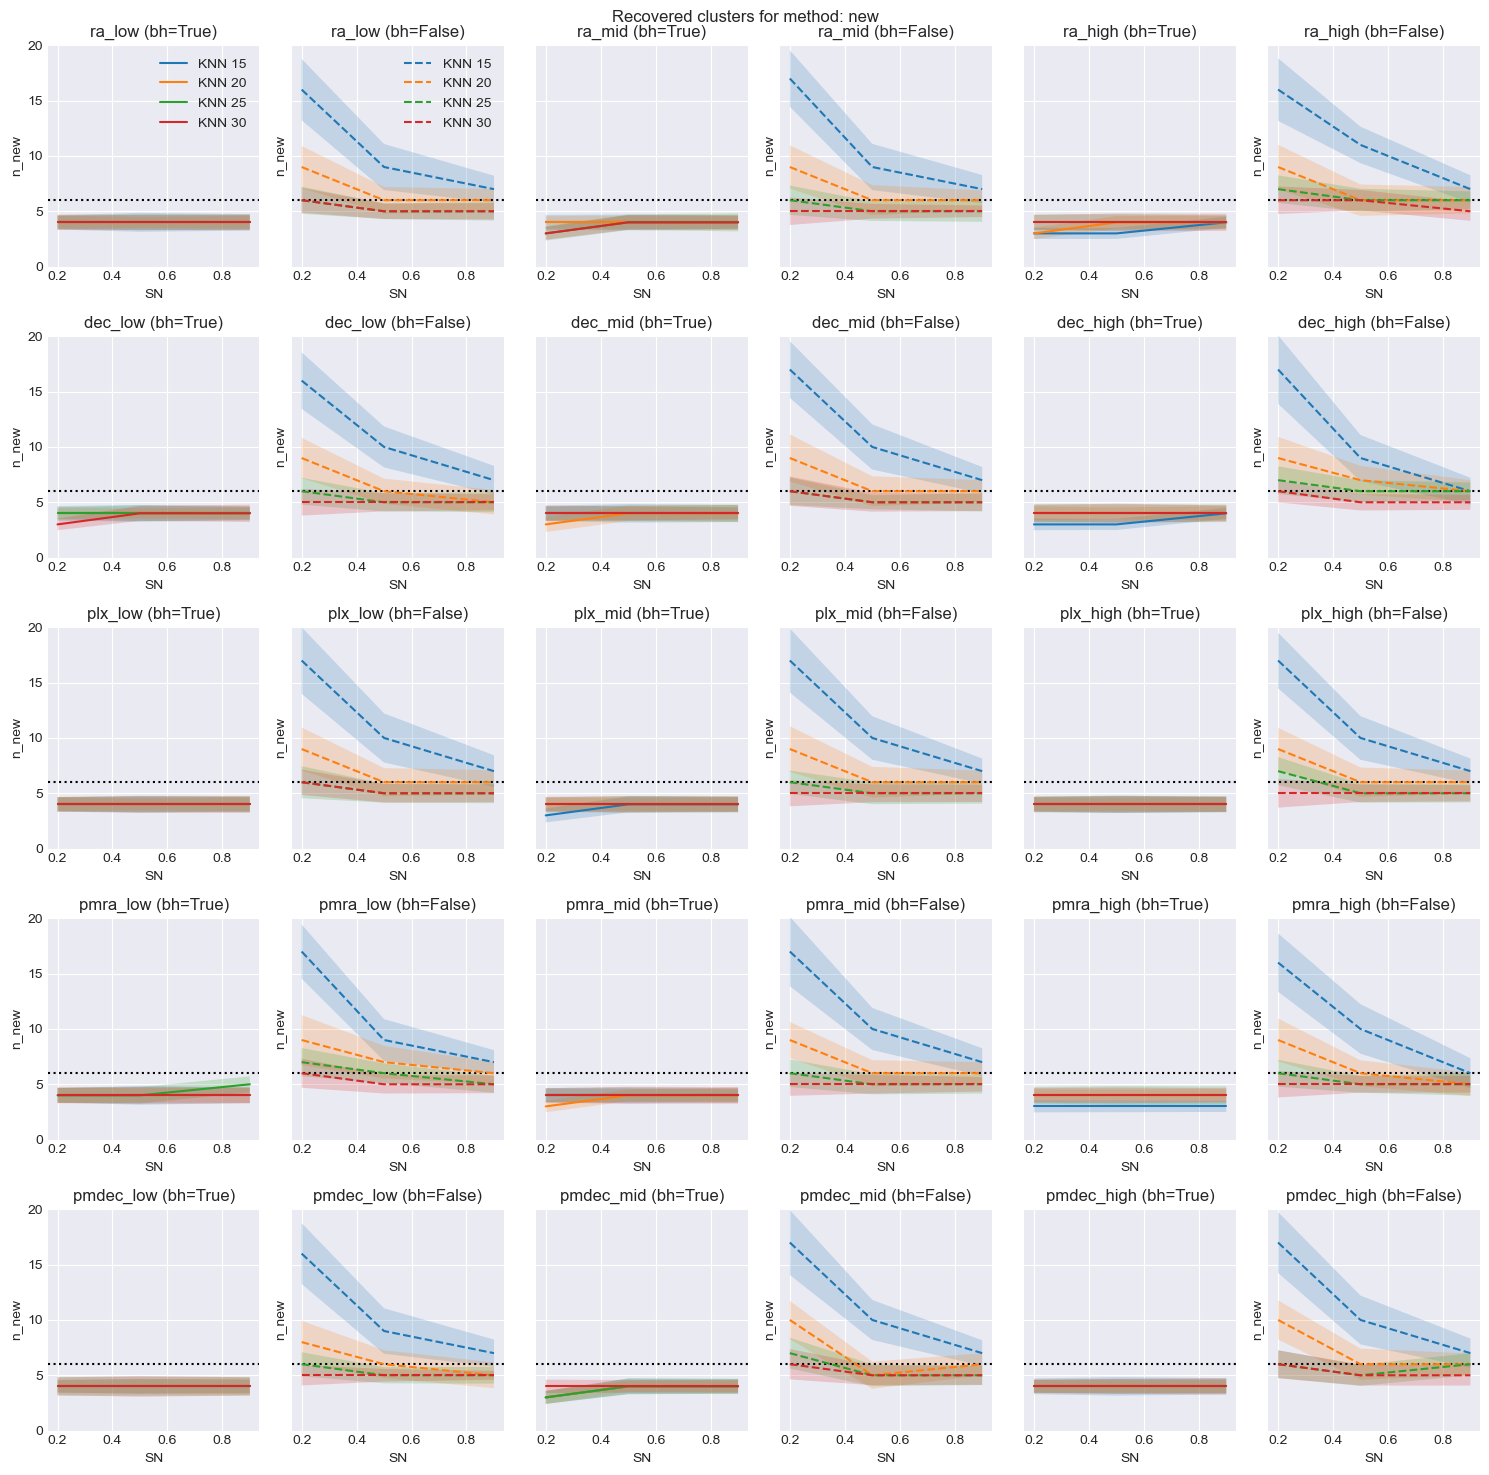

In [12]:
# n clusters

for df,method in zip([df_n_rfs, df_n_rsc, df_n_new],["rfs", "rsc","new"]):

    # Create subplots for each column
    fig, axes = plt.subplots(5, 6, sharey=True, figsize=(15, 15))
    axes = axes.flatten()

    # Group the DataFrame by the 'KNN' and 'bh' columns
    grouped_df = df.groupby(['KNN', 'bh'])

    ax_id = 0
    for col, ax in zip(columns_of_interest, axes):
        # Plotting for bh=True
        axes[ax_id].axhline(y=6, color='black', linestyle='dotted', linewidth=1.5)
        axes[ax_id+1].axhline(y=6, color='black', linestyle='dotted', linewidth=1.5)

        for (knn, bh), group in grouped_df:
            if bh.all():
                group.sort_values(by="SN", inplace=True)
                axes[ax_id].plot(
                    group['SN'],
                    group[col],
                    label=f'KNN {knn}',
                    linestyle='-'
                )
                axes[ax_id].fill_between(
                    group['SN'],
                    group[col] - group[f'std_{col}'],
                    group[col] + group[f'std_{col}'],
                    alpha=0.2
                )

            axes[ax_id].set_xlabel('SN')
            if ax_id in (0,6,12,18,24):
                axes[ax_id].set_ylabel(f'n_{method}')
            if ax_id == 0:
                axes[ax_id].legend()
            axes[ax_id].set_title(f'{col} (bh=True)')
            axes[ax_id].set_ylim(0,20)

        # Plotting for bh=False
        for (knn, bh), group in grouped_df:
            if not bh.any():

                group.sort_values(by="SN", inplace=True)
                axes[ax_id+1].plot(
                    group['SN'],
                    group[col],
                    label=f'KNN {knn}',
                    linestyle='--'
                )
                axes[ax_id+1].fill_between(
                    group['SN'],
                    group[col] - group[f'std_{col}'],
                    group[col] + group[f'std_{col}'],
                    alpha=0.2
                )

            # Adding labels and legend
            axes[ax_id+1].set_xlabel('SN')
            if int(ax_id+1) ==1:
                axes[ax_id+1].legend()
            axes[ax_id+1].set_ylabel(f'n_{method}')
            #axes[ax_id+1].legend()
            axes[ax_id+1].set_title(f'{col} (bh=False)')
            axes[ax_id+1].set_ylim(0,20)


        ax_id +=2
    # Adjust layout for better readability
    plt.suptitle(f"Recovered clusters for method: {method}")

    plt.tight_layout()

    plt.savefig(output_path+f"n_summary_{method}.pdf", dpi=400)

    # Show the plots
    plt.show()
    #plt.close()

